In [ ]:
## 1. 安装

In [1]:
# 目前PaddleSpeech不完全支持Windows，相较于Linux，在windows系统上无法进行训练、测试，只能进行简单推理，因此使用Ipython进行测试
! pip install pytest-runner -i https://pypi.tuna.tsinghua.edu.cn/simple 
! pip install paddlepaddle -i  https://mirror.baidu.com/pypi/simple --user 
! pip install paddlespeech -i  https://pypi.tuna.tsinghua.edu.cn/simple --user 
# ! pip install pydub  # 主要用于对不同长度的
# ! pip install paddleseg 

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://mirror.baidu.com/pypi/simple
ERROR: Could not find a version that satisfies the requirement paddlepaddle (from versions: none)
ERROR: No matching distribution found for paddlepaddle
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 583.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.8/401.8 kB 648.0 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 1.6 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.8 MB/s eta 0:00:00eta 0:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 1.7 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.8/203.8 kB 532.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import warnings
warnings.filterwarnings("ignore")
import IPython
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import paddle
from paddleaudio import load

# 需要重启内核加载whl资源

In [3]:
data, sr = load(filepath='/kaggle/input/audiodatasets/AudioDaraset/MoveDown/07_100_230_moveDown.wav')  # 单通道，float32音频样本点
print('wav shape: {}'.format(data.shape))
print('sample rate: {}'.format(sr))
print(f'wave data:{data}')
spec = data.reshape([-1]).unsqueeze(0).numpy()
print(f'paddleshape:{spec.dtype},and its shape:{spec.shape}')
# 展示音频波形
# plt.figure()
# plt.plot(spec)
# plt.show()

wav shape: [1, 239616]
sample rate: 16000
wave data:Tensor(shape=[1, 239616], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [[ 0.03857422,  0.04284668, -0.07702637, ...,  0.12783813,
          0.11941528, -0.02142334]])
paddleshape:float32,and its shape:(1, 239616)


W0726 08:33:21.600982    34 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 12.4, Runtime API Version: 11.8
W0726 08:33:21.612591    34 gpu_resources.cc:149] device: 0, cuDNN Version: 8.9.


Tensor(shape=[1, 239616], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [[ 0.03857422,  0.04284668, -0.07702637, ...,  0.12783813,
          0.11941528, -0.02142334]])
[1, 239616]
spectrogram.shape: [1, 513, 749]
spectrogram.dtype: paddle.complex64
[[ 1.5052445   1.5594268   1.4132723  ...  0.84849834  0.8201052
   1.1838164 ]
 [ 1.4374582   0.46365434  0.47078598 ...  2.6521544   3.3225424
   3.1641512 ]
 [ 2.9918113   2.220481    2.056326   ...  3.9176483   3.0388045
   3.481162  ]
 ...
 [-8.84104    -2.8891485  -2.7330685  ... -3.4643266  -3.0899076
  -1.883738  ]
 [-3.2686093  -2.67744    -2.7118738  ... -4.484046   -3.852382
  -1.6826549 ]
 [-2.3697386  -4.1520586  -3.2663088  ... -4.8031282  -3.2864096
  -2.3542302 ]]
spectrogram.shape: (513, 749)


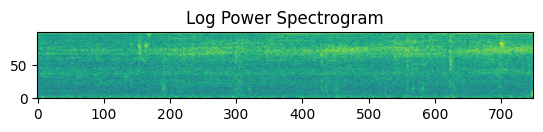

In [4]:
import paddle
import numpy as np

data, sr = load(filepath='/kaggle/input/audiodatasets/AudioDaraset/MoveDown/07_100_230_moveDown.wav')
print(data)
x = paddle.to_tensor(data) # 此处会转换成正常的numpy数据组
n_fft = 1024 # 快速傅里叶变换后的基础频率，此处为512个频段
win_length = 1024  # 决定分组的基频，此处基频是1024开始，之后没1024取一个基频
hop_length = 320  # 决定取样的帧数，此处是否影响输入网络，先用这组参数，后面对参数进行优化在处理
print(data.shape)
# [D, T]
spectrogram = paddle.signal.stft(x, n_fft=n_fft, win_length=win_length, hop_length=hop_length, onesided=True)  # 单边频谱
print('spectrogram.shape: {}'.format(spectrogram.shape))
print('spectrogram.dtype: {}'.format(spectrogram.dtype))


spec = np.log(np.abs(spectrogram.numpy())**2) # 平方绝对值取对数单边普
spec = spec.reshape([513,-1]) # 降维
print(spec)
print('spectrogram.shape: {}'.format(spec.shape))
plt.figure()
plt.title("Log Power Spectrogram")
plt.imshow(spec[:100, :], origin='lower')
plt.show()

Tensor(shape=[239616], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [ 0.03857422,  0.04284668, -0.07702637, ...,  0.12783813,
         0.11941528, -0.02142334])
Tensor(shape=[1, 239616], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [[ 0.03857422,  0.04284668, -0.07702637, ...,  0.12783813,
          0.11941528, -0.02142334]])
log_fbank:[1, 64, 749]
log_fbank.shape: [64, 749]


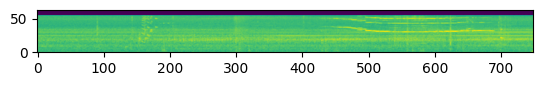

In [5]:
from paddleaudio.features import LogMelSpectrogram
# 是一个CNN自带的架构
f_min=50.0 # 最低频率
f_max=14000.0 # 最高频率 消除低频噪声和混叠效应
n_mels=64 # 正常情况为20，但此处为64

#   - sr: 音频文件的采样率。
#   - n_fft: FFT样本点个数。
#   - hop_length: 音频帧之间的间隔。
#   - win_length: 窗函数的长度。
#   - window: 窗函数种类。
#   - n_mels: 梅尔刻度数量。
feature_extractor2 = LogMelSpectrogram(
    sr=sr, # 采样率，采样率越高，音频越清晰，但数据量越大，反之同理，因此取值范围为[100, 220500]，会影响神经网络的输入
    n_fft=n_fft, # 快速傅里叶变换后的基础频率，此处为512个频段，
    hop_length=hop_length,  # 帧移320 ，最佳
    win_length=win_length,  # 窗长，决定分组的基频，此处基频是1024开始，之后没1024取一个基频
    window='hann', 
    f_min=f_min,
    f_max=f_max,
    n_mels=n_mels)
data = data.reshape([-1])
print(data) # 传入的data应该是一个一维数据，因为是单声道
x = paddle.to_tensor(data).unsqueeze(0)     # [B, L],在第0行增加一列，变为二维数组
print(x)
log_fbank = feature_extractor2(x) # [B, D, T] d=64,t=690
print(f'log_fbank:{log_fbank.shape}')
log_fbank = log_fbank.squeeze(0) # [D, T] # 再次降维
print('log_fbank.shape: {}'.format(log_fbank.shape)) # 注意输入的数据是1000frams* 64 mel 偏置
# 1000帧数 = sr信号采样率 * 5min音频长度 //hop_lenghth + 1 

plt.figure()
plt.imshow(log_fbank.numpy(), origin='lower') # 转换为2维度数组
plt.show()

Tensor(shape=[1, 220500], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [[-0.47647095, -0.52462769, -0.47766113, ...,  0.00250244,
          0.00088501, -0.00061035]])
[1, 220500]
spectrogram.shape: [1, 513, 690]
spectrogram.dtype: paddle.complex64
[[  2.5776439    1.8093268    0.02342188 ... -11.486495    -1.5835786
    1.4675672 ]
 [ -3.0297122    0.40011355   0.629084   ...   1.3949804    1.1525328
   -4.139007  ]
 [  1.4570662   -2.3674824    0.8941049  ...   0.47126326   0.8862567
   -1.4614304 ]
 ...
 [ -8.946656    -1.5129128   -5.8312664  ...  -9.616156    -8.5377865
   -9.306151  ]
 [ -4.5869603   -1.3126677   -5.8360124  ...  -9.620955    -8.565222
   -9.192277  ]
 [ -9.0501795   -1.2116511   -5.805555   ...  -9.560873    -8.690237
   -9.454654  ]]
spectrogram.shape: (513, 690)


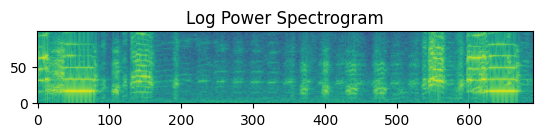

In [6]:
import paddle
import numpy as np

data, sr = load(filepath='/kaggle/input/noise-sound/cock.wav')
print(data)
x = paddle.to_tensor(data)
n_fft = 1024
win_length = 1024
hop_length = 320
print(data.shape)
# [D, T]
spectrogram = paddle.signal.stft(x, n_fft=n_fft, win_length=win_length, hop_length=hop_length, onesided=True)  
print('spectrogram.shape: {}'.format(spectrogram.shape))
print('spectrogram.dtype: {}'.format(spectrogram.dtype))


spec = np.log(np.abs(spectrogram.numpy())**2)
spec = spec.reshape([513,-1])
print(spec)
print('spectrogram.shape: {}'.format(spec.shape))
plt.figure()
plt.title("Log Power Spectrogram")
plt.imshow(spec[:100, :], origin='lower')
plt.show()

In [7]:
# 处理音频文件长度
import contextlib
import wave
def get_sound_len(file_path):
    with contextlib.closing(wave.open(file_path, 'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        wav_length = frames / float(rate)

    return wav_length
plt.show()

In [8]:
# 编译wav文件
import glob
sound_files=glob.glob('/kaggle/input/audiodatasets/AudioDaraset/*/*.wav')
print(sound_files[0])
print(len(sound_files))

/kaggle/input/audiodatasets/AudioDaraset/MoveDown/07_16_230_moveDown.wav
98


In [9]:
# 统计最长、最短音频
sounds_len=[]
for sound in sound_files:
    sounds_len.append(get_sound_len(sound))
print("音频最大长度：",max(sounds_len),"秒")
print("音频最小长度：",min(sounds_len),"秒")

音频最大长度： 14.976 秒
音频最小长度： 14.976 秒


In [10]:
# 统一到15s
from pydub import AudioSegment

audio = AudioSegment.from_wav('/kaggle/input/audiodatasets/AudioDaraset/MoveDown/07_100_230_moveDown.wav')
print(str(audio.duration_seconds))

i = 1
padded = audio
while padded.duration_seconds * 1000 < 15000:
    padded = audio * i # 空白填充
    i = i + 1
padded[0:15000].set_frame_rate(16000).export('/kaggle/input/audiodatasets/AudioDaraset/MoveDown/07_100_230_moveDown.wav', format='wav')

14.976


OSError: [Errno 30] Read-only file system: '/kaggle/input/audiodatasets/AudioDaraset/MoveDown/07_100_230_moveDown.wav'

In [14]:
# 定义函数，如未达到最大长度，则重复填充，最终从超过15s的音频中截取
from pydub import AudioSegment

def convert_sound_len(filename):
    audio = AudioSegment.from_wav(filename)
    i = 1
    padded = audio*i
    while padded.duration_seconds * 1000 < 15000:
        i = i + 1
        padded = audio * i
    padded[0:15000].set_frame_rate(16000).export(filename, format='wav')

In [15]:
# 统一所有音频到定长15s
for sound in sound_files:
    convert_sound_len(sound)

OSError: [Errno 30] Read-only file system: '/kaggle/input/audiodatasets/AudioDaraset/MoveDown/07_16_230_moveDown.wav'

In [24]:
import os
from paddleaudio.datasets.dataset import AudioClassificationDataset # 注意此处路径

class CustomDataset(AudioClassificationDataset):
    # List all the class labels
    label_list = [
        'MoveDown',
        'MoveUp',
    ]
    file_dir = '/kaggle/input/audiodatasets/AudioDaraset/'
    

    def __init__(self, **kwargs):
        files, labels = self._get_data()
        super(CustomDataset, self).__init__(
            files=files, labels=labels, feat_type='raw', **kwargs)
#         if segment == 'train':
#             self.file_dir ='/kaggle/input/audiodatasets/AudioDaraset/'
#         elif segment == 'evaluate':
#             self.file_dir = '/kaggle/input/audio-dev/AudioDaraset _dev/'

    # 返回音频文件、label值
    def _get_data(self):
        '''
        This method offer information of wave files and labels.
        '''
        files = []
        labels = []

        for i in range(len(self.label_list)):
            single_class_path=os.path.join(self.file_dir, self.label_list[i])            
            for sound in os.listdir(single_class_path):
#                 print(sound)
                if 'wav' in sound:
                    sound=os.path.join(single_class_path, sound)
                    files.append(sound)
                    labels.append(i)
        return files, labels
    
class CustomDatasetDev(AudioClassificationDataset):
    # List all the class labels
    label_list = [
        'MoveDown',
        'MoveUp',
    ]
    file_dir = '/kaggle/input/audio-dev/AudioDaraset _dev/'
    

    def __init__(self, **kwargs):
        files, labels = self._get_data()
        super(CustomDatasetDev, self).__init__(
            files=files, labels=labels, feat_type='raw', **kwargs)
#         if segment == 'train':
#             self.file_dir ='/kaggle/input/audiodatasets/AudioDaraset/'
#         elif segment == 'evaluate':
#             self.file_dir = '/kaggle/input/audio-dev/AudioDaraset _dev/'

    # 返回音频文件、label值
    def _get_data(self):
        '''
        This method offer information of wave files and labels.
        '''
        files = []
        labels = []

        for i in range(len(self.label_list)):
            single_class_path=os.path.join(self.file_dir, self.label_list[i])            
            for sound in os.listdir(single_class_path):
#                 print(sound)
                if 'wav' in sound:
                    sound=os.path.join(single_class_path, sound)
                    files.append(sound)
                    labels.append(i)
        return files, labels

In [25]:
# 定义dataloader
import paddle
# from paddlespeech.audio.features import LogMelSpectrogram

sample_rate = 16000
train_ds = CustomDataset(sample_rate=sample_rate)
evl_ds = CustomDatasetDev(sample_rate=sample_rate)
feature_extractor = feature_extractor2

train_sampler = paddle.io.DistributedBatchSampler(
    train_ds, batch_size=16, shuffle=True, drop_last=False)
evl_sampler = paddle.io.DistributedBatchSampler(
    evl_ds, batch_size=16, shuffle=True, drop_last=False)
train_loader = paddle.io.DataLoader(
    train_ds,
    batch_sampler=train_sampler,
    return_list=True,
    use_buffer_reader=True)
evl_loader = paddle.io.DataLoader(
    evl_ds,
    batch_sampler=evl_sampler,
    return_list=True,
    use_buffer_reader=True)
        
    

In [26]:
from paddlespeech.cls.models import cnn14
backbone = cnn14(pretrained=True, extract_embedding=True) # 该网络是预训练模型，网络参数以保存，之后进行的工作为微调

[2024-07-26 08:43:12,113] [    INFO] - unique_endpoints {''}
[2024-07-26 08:43:12,114] [    INFO] - Downloading panns_cnn14.pdparams from https://bj.bcebos.com/paddleaudio/models/panns_cnn14.pdparams
[2024-07-26 08:43:12,115] [    INFO] - md5check /root/.paddlespeech/models/panns/panns_cnn14.pdparams and None
100%|██████████| 479758/479758 [00:47<00:00, 10017.13it/s]


In [27]:
import paddle.nn as nn


class SoundClassifier(nn.Layer):

    def __init__(self, backbone, num_class, dropout=0.2):
        super().__init__()
        self.backbone = backbone # 待fine-tune的pre-trained模型
        self.dropout = nn.Dropout(dropout) # 减少正则化的一种方法，在训练过程中将一些神经元输出设hi为0，即随机丢弃一些神经元输出
        self.fc = nn.Linear(self.backbone.emb_size, num_class) # 注意标签的分类

    def forward(self, x):
        x = x.unsqueeze(1)  # 输入矩阵[B, T, N]->[B, 1, T, N]
        # X shape:[16, 1, 690, 64]
        # print(f'X shape:{x.shape}')
        x = self.backbone(x) # 该网络会自动将690帧数填充到1000，即小于1000即可
        x = self.dropout(x)
        logits = self.fc(x) #输出为lable_list

        return logits

# model = SoundClassifier(backbone, num_class=len(ESC50.label_list))
model = SoundClassifier(backbone, num_class=len(train_ds.label_list))

In [28]:
optimizer = paddle.optimizer.Adam(learning_rate=1e-4, weight_decay=paddle.regularizer.L2Decay(coeff=1e-5), parameters=model.parameters())# 加入正则化项防止过拟合
criterion = paddle.nn.loss.CrossEntropyLoss() # 分类问题使用交叉熵作为损失

[2024-07-26 08:46:47,825] [   TRAIN] - Epoch=1/20, Step=2/7 loss=0.3927 acc=0.8750 lr=0.000100
[2024-07-26 08:46:48,649] [   TRAIN] - Epoch=1/20, Step=4/7 loss=0.4361 acc=0.8750 lr=0.000100
[2024-07-26 08:46:49,475] [   TRAIN] - Epoch=1/20, Step=6/7 loss=0.4259 acc=0.8750 lr=0.000100
[2024-07-26 08:46:50,437] [   TRAIN] - Epoch=2/20, Step=2/7 loss=0.3316 acc=0.9688 lr=0.000100
[2024-07-26 08:46:51,276] [   TRAIN] - Epoch=2/20, Step=4/7 loss=0.3518 acc=0.9062 lr=0.000100
[2024-07-26 08:46:52,113] [   TRAIN] - Epoch=2/20, Step=6/7 loss=0.3934 acc=0.8125 lr=0.000100
[2024-07-26 08:46:53,063] [   TRAIN] - Epoch=3/20, Step=2/7 loss=0.3014 acc=0.9375 lr=0.000100
[2024-07-26 08:46:53,904] [   TRAIN] - Epoch=3/20, Step=4/7 loss=0.3724 acc=0.8750 lr=0.000100
[2024-07-26 08:46:54,744] [   TRAIN] - Epoch=3/20, Step=6/7 loss=0.4424 acc=0.8438 lr=0.000100
[2024-07-26 08:46:55,710] [   TRAIN] - Epoch=4/20, Step=2/7 loss=0.3495 acc=0.8750 lr=0.000100
[2024-07-26 08:46:56,554] [   TRAIN] - Epoch=4/20,

ValueError: x and y must have same first dimension, but have shapes (1,) and (140,)

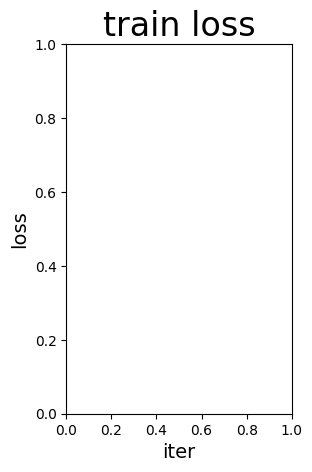

In [30]:
from paddleaudio.utils import logger

epochs = 20
steps_per_epoch = len(train_loader)
log_freq = 2
eval_freq = 5
iters = 0
losses = []
accuracys = []
for epoch in range(1, epochs + 1):
    model.train()

    avg_loss = 0
    num_corrects = 0
    num_samples = 0
    for batch_idx, batch in enumerate(train_loader):
        waveforms, labels = batch
        feats = feature_extractor(waveforms)
        feats = paddle.transpose(feats, [0, 2, 1])  # [B, N, T] -> [B, T, N]
        logits = model(feats)

        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        if isinstance(optimizer._learning_rate,
                      paddle.optimizer.lr.LRScheduler):
            optimizer._learning_rate.step()
        optimizer.clear_grad()

        # Calculate loss
        avg_loss += float(loss)

        # Calculate metrics
        preds = paddle.argmax(logits, axis=1)
        num_corrects += (preds == labels).numpy().sum()
        num_samples += feats.shape[0]
        losses.append(avg_loss)
        if (batch_idx + 1) % log_freq == 0:
            lr = optimizer.get_lr()
            avg_loss /= log_freq
            avg_acc = num_corrects / num_samples
            accuracys.append(avg_acc)
            print_msg = 'Epoch={}/{}, Step={}/{}'.format(
                epoch, epochs, batch_idx + 1, steps_per_epoch)
            print_msg += ' loss={:.4f}'.format(avg_loss)
            print_msg += ' acc={:.4f}'.format(avg_acc)
            print_msg += ' lr={:.6f}'.format(lr)
            logger.train(print_msg)

            avg_loss = 0
            num_corrects = 0
            num_samples = 0
        iters += 1
        
    if epoch % eval_freq == 0 and batch_idx + 1 == steps_per_epoch:
        model.eval()
        num_corrects = 0
        num_samples = 0
        with logger.processing('Evaluation on validation dataset'):
            for batch_idx, batch in enumerate(evl_loader):
                waveforms, labels = batch
                feats = feature_extractor(waveforms)
                feats = paddle.transpose(feats, [0, 2, 1])
                
                logits = model(feats)

                preds = paddle.argmax(logits, axis=1)
                num_corrects += (preds == labels).numpy().sum()
                num_samples += feats.shape[0]

        print_msg = '[Evaluation result]'
        print_msg += ' dev_acc={:.4f}'.format(num_corrects / num_samples)

        logger.eval(print_msg)

paddle.save(model.state_dict(), 'work/'+'ver1.0'+'.pdparams') # 保存权重

# 画出训练过程中Loss和Accuracy的变化曲线
# plot 1:
plt.subplot(1,2,1)
plt.title("train loss", fontsize=24)
plt.xlabel("iter", fontsize=14)
plt.ylabel("loss", fontsize=14)
plt.plot(iters, losses,color='red',label='train loss')
# plot 2:
plt.subplot(1,2,2)
plt.title("Accuracy", fontsize=24)
plt.xlabel("iter", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.plot(iters, accuracys,color='red',label='Accuracy')

plt.suptitle('Result')
plt.grid()
plt.show()

In [36]:
losses[1]

0.7854443788528442

In [33]:
top_k = 1
wav_file = '/kaggle/input/audiodatasets/AudioDaraset/MoveDown/07_14_230_moveDown.wav'
wave_info = paddle.audio.info(wav_file)
print(f'Wave info : {wave_info.sample_rate}')

waveform, sr = load(filepath='/kaggle/input/audiodatasets/AudioDaraset/MoveDown/07_14_230_moveDown.wav', normalize=True)
waveform = waveform.reshape([-1])
print(waveform) 
feats = feature_extractor(paddle.to_tensor(paddle.to_tensor(waveform).unsqueeze(0)))
feats = paddle.transpose(feats, [0, 2, 1])  # [B, N, T] -> [B, T, N] [1, 690, 64]
print(feats.shape)

logits = model(feats)
probs = nn.functional.softmax(logits, axis=1).numpy()# 转为概率p[0,1]内分布

sorted_indices = probs[0].argsort()# 对概率进行排序

msg = f'[{wav_file}]\n'
for idx in sorted_indices[-1:-top_k-1:-1]: # 遍历lable
    msg += f'{train_ds.label_list[idx]}: {probs[0][idx]:.5f}\n'
print(msg) # 预测正确

Wave info : 16000
Tensor(shape=[239616], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [ 0.        , -0.00396729, -0.03973389, ...,  0.08331299,
         0.07934570,  0.06750488])
[1, 749, 64]
[/kaggle/input/audiodatasets/AudioDaraset/MoveDown/07_14_230_moveDown.wav]
MoveDown: 0.92249



In [32]:
# 测试
from paddleaudio.utils import logger
params_file_path = '/kaggle/working/work/ver1.0.pdparams'
model_state_dict = paddle.load(params_file_path)
model.load_dict(model_state_dict)
model.eval()
num_corrects = 0
num_samples = 0
with logger.processing('Evaluation on validation dataset'):
    for batch_idx, batch in enumerate(evl_loader):
        waveforms, labels = batch
        feats = feature_extractor(waveforms)
        feats = paddle.transpose(feats, [0, 2, 1])
                
        logits = model(feats)

        preds = paddle.argmax(logits, axis=1)
        num_corrects += (preds == labels).numpy().sum()
        num_samples += feats.shape[0]

print_msg = '[Evaluation result]'
print_msg += ' dev_acc={:.4f}'.format(num_corrects / num_samples)

logger.eval(print_msg) # 计算所有验证集样本的准确率

[2024-07-26 08:50:20,268] [    EVAL] - [Evaluation result] dev_acc=1.0000m
